___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.machinecurve.com/wp-content/uploads/2020/11/feed-2.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___


### <font color= #2E9AFE> Tema: Entrenamiento y Validación</font>

**¿Qué es?**

Es una técnica para evaluar el performance de un modelo de machine learning. 

Puede ser usado para problemas de clasificación y regresión y puede ser usado para cualquier algoritmo de aprendizaje supervisado. 

**¿Cómo funciona?**

Entrenar un modelo supervisado es conceptualmente muy simple e implica los siguientes tres pasos:


In [ ]:
from IPython.display import Image
Image(filename='proceso.png', width=600, height=400)

**¿Porqué?**

Nos ayuda a estimar el performance de un modelo en datos nuevos, es decir datos que no se usaron para estimar el modelo. 

La idea es ajustar un modelo en datos disponibles con entradas y salidas conocidas y luego hacer predicciones sobre nuevos datos futuros donde no tengamos la salida esperada o los valores objetivo. 

**¿Cuándo funciona?**

Cuando tenemos suficientes datos disponibles. El procedimiento de train-test no funciona muy bien cuando los datos disponibles son pocos. 

La razón es que cuando el conjunto de datos se divide en conjuntos de entrenamiento y de prueba, no habrá suficientes datos en el conjunto de datos de entrenamiento para que el modelo aprenda un mapeo de entradas y salidas. 
Tampoco habrá datos suficientes en el conjunto de prueba (test) para evaluar el rendimiento del modelo

**¿Qué hacer si se tienen datos insuficientes?**

Una alternativa es el procedimiento de *K-fold cross-validation*


**Entonces...¿cuándo uso el train-test split?**

- Cuando no es tan costoso entrenar el modelo
- Cuando tenemos bases de datos con muchos datos
- Si se necesita estimar una medida de performance rápidamente

#### <font color= #2E9AFE> Configuración</font>

Parámetro principal de configuración: tamaño de entrenamiento y prueba (porcentaje).

Tristemente... no hay una división óptima :( 

Separaciones más comunes:
- Entrenamiento: 80%, Prueba 20%
- Entrenamiento: 70%, Prueba 30%
- Entrenamiento: 50%, Prueba 50%

In [1]:
#Train test split en Python

#Librerías
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Crear datos
X, y = make_blobs(n_samples=1000, n_features=1)

In [2]:
datos = pd.DataFrame(np.column_stack((X,y)), columns=['X','y'])
datos.head()

,X,y
0,8.739875,1.0
1,10.501471,1.0
2,10.010925,1.0
3,-7.551187,0.0
4,10.171315,1.0


In [3]:
#Tamaño de los datos
datos.shape

(1000, 2)

In [4]:
# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #tomando el 30% de los datos de prueba (test)
print("Tamaño de X entrenamiento:",X_train.shape)
print("Tamaño de X prueba:",X_test.shape)
print("Tamaño de y entrenamiento:",y_train.shape)
print("Tamaño de y prueba:",y_test.shape)


Tamaño de X entrenamiento: (700, 1)
Tamaño de X prueba: (300, 1)
Tamaño de y entrenamiento: (700,)
Tamaño de y prueba: (300,)


In [5]:
#imprimindo sólo 5 filas de las "X" de entrenamiento
X_train[:5,:]

array([[ 9.95491287],
       [-3.47054948],
       [-9.69202722],
       [-8.79482498],
       [-7.48630406]])

In [6]:
# Dividir en train y test con replicamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)#añadimos una semilla para que todos tengamos el mismo resultado
print("Tamaño de X entrenamiento:",X_train.shape)
print("Tamaño de X prueba:",X_test.shape)
print("Tamaño de y entrenamiento:",y_train.shape)
print("Tamaño de y prueba:",y_test.shape)


Tamaño de X entrenamiento: (700, 1)
Tamaño de X prueba: (300, 1)
Tamaño de y entrenamiento: (700,)
Tamaño de y prueba: (300,)


In [7]:
X_train[:5,:]

array([[-3.52837945],
       [ 7.83501867],
       [-2.15163316],
       [-7.1865756 ],
       [-8.95996596]])

#### <font color= #2E9AFE> Divisiones estratificadas</font>

**Para problemas de clasificación**

La mayoría de los problemas de clasificación no tienen un número balanceado de datos para cada etiqueta de clase. 
Por lo tanto es deseable dividir los datos en conjunto de entrenamiento y prueba de tal manera que se conserven las mismas proporciones de datos en cada clase observada en el conjunto de datos original. 

Para eso podemos usar la división estratificada de los datos de entrenamiento y prueba

In [8]:
#tenemos 1,000 datos en nuestra Y
y.shape

(1000,)

In [9]:
#¿cuántas clases distintas tiene la variable a predecir (Y)?
datos['y'].value_counts()

0.0    334
1.0    333
2.0    333
Name: y, dtype: int64

<AxesSubplot:ylabel='y'>

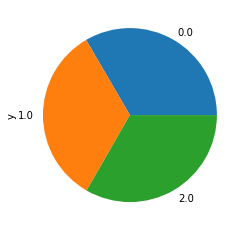

In [10]:
#¿cuántas clases distintas tiene la variable a predecir (Y)?
datos['y'].value_counts().plot(kind='pie')

Queremos que al hacer nuestra división de train/test quede más o menos la misma distribución de clases.

In [11]:
# Dividir en train y test CON división estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [12]:
#¿cuántas clases distintas tiene la variable a predecir de entrenamiento (Y train)?
pd.DataFrame(y_train).value_counts()

0    234
1    233
2    233
dtype: int64

<AxesSubplot:ylabel='None'>

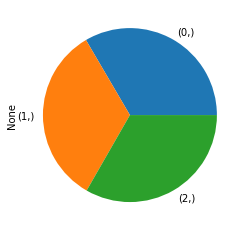

In [13]:
#¿cuántas clases distintas tiene la variable a predecir de entrenamiento (Y train)?
pd.DataFrame(y_train).value_counts().plot(kind='pie')

### <font color= #2E9AFE> Entrenamiento y prueba para modelos de machine learning</font>

#### <font color= blue> Clasificación</font>

In [14]:
#Cargar datos
data = pd.read_csv('glass.data',header=None)
names = ['ID','Indice_Refraccion','Na','Mg','Al','Si','K', 'Ca','Ba','Fe','Tipo_Vidrio']
data.columns = names

#Separamos las X y las Y
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [15]:
data.head()

,ID,Indice_Refraccion,Na,Mg,Al,Si,K,Ca,Ba,Fe,Tipo_Vidrio
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [16]:
data.shape

(214, 11)

In [17]:
#Cuántas clases tengo en mi variable a predecir Y (tipo de vidrio)
data.Tipo_Vidrio.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Tipo_Vidrio, dtype: int64

In [18]:
#dividir entre train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123, stratify=y)


print("Tamaño de X entrenamiento:",X_train.shape)
print("Tamaño de X prueba:",X_test.shape)
print("Tamaño de y entrenamiento:",y_train.shape)
print("Tamaño de y prueba:",y_test.shape)

Tamaño de X entrenamiento: (149, 10)
Tamaño de X prueba: (65, 10)
Tamaño de y entrenamiento: (149,)
Tamaño de y prueba: (65,)


In [19]:
#Cuántas clases tengo en mi variable a predecir Y de entrenamiento(tipo de vidrio)
y_train.value_counts()

2    53
1    49
7    20
3    12
5     9
6     6
Name: Tipo_Vidrio, dtype: int64

In [20]:
#Ajustar regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Crear un objeto de regresion logistica
model = LogisticRegression()
#Ajustamos modelo con los datos de entreaniemto 

model.fit(X_train, y_train)
# Predicciones con datos de prueba ->y^
pred = model.predict(X_test)

#Evaluamos predicciones contra datos reales
accuracy = accuracy_score(y_test,pred)
print('Accuracy: %.3f'%accuracy)

Accuracy: 1.000


C:\Users\insp3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### <font color= blue> Regresión</font>

In [21]:
from sklearn import datasets
boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()

C:\Users\insp3\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [22]:
#dividimos las X de las Y
X = df_boston.iloc[:, :-1]
y = df_boston.iloc[:, -1]

In [23]:
#divido datos en prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print("Tamaño de X entrenamiento:",X_train.shape)
print("Tamaño de X prueba:",X_test.shape)
print("Tamaño de y entrenamiento:",y_train.shape)
print("Tamaño de y prueba:",y_test.shape)

Tamaño de X entrenamiento: (354, 13)
Tamaño de X prueba: (152, 13)
Tamaño de y entrenamiento: (354,)
Tamaño de y prueba: (152,)


In [24]:
#Ajustar regresión lineal
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
#Creamos objeto de regresion lineal
model = LinearRegression()
#Akustamos el modelo con datos de entrenamiento 
model.fit(X_train,y_train)
pred = model.predict(X_test)
# Evaluamos los datos
mae = mean_absolute_error(y_test, pred)
print('MAE: %.3f'%mae)


MAE: 3.345


**¿Cuál es la desventaja de usar el procedimiento de test/train split para evaluar el modelo?**

Proporciona una estimación de alta varianza ya que si cambiamos cuáles observaciones se van para los datos de prueba, puede cambiar significantemente la precisión del modelo. 

In [25]:
#cargar librerías
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [26]:
#cargar datos
iris = load_iris()
#separar X y Y
X=iris.data
y=iris.target

In [27]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [28]:
#Hacer el train/test split con diferentes valores aleatorios
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7) #2 #7

#Revisar el accuracy (precisión) de clasificación del KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.895


**Pregunta:** Qué pasaría si dividiéramos los datos muchas veces de distintas maneras, calculando la presición para cada partición y finalmente promediando los resultados?

**Respuesta:** usamos cross validation!

**Otra Pregunta:** ¿cuándo hacemos la selección de variables? antes o después de dividir los datos?

Demostrémoslo

In [29]:
#Selección de variables antes de dividir los datos

import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# datos aleatorios:
np.random.seed(1) #semilla para que todos tengamos el mismo resultado
X = np.random.randn(500, 10000) #500 filas con 10000 variables
y = np.random.choice(2, size=500)


In [30]:
#seleccionar las mejores 25 variables
selector = SelectKBest(k=25) #basándose en la prueba de ANOVA
# primero seleccionar variables
X_selected = selector.fit_transform(X,y)
# después dividir
X_selected_train, X_selected_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=42)

# ajustar regresión logística
lr = LogisticRegression()
lr.fit(X_selected_train,y_train)

# predecir en los datos de prueba y obtener la precisión de prueba:
y_pred = lr.predict(X_selected_test)
accuracy_score(y_test, y_pred)

0.76

Obtenemos una precisión de prueba del 76%! en un problema binario, donde de acuerdo con las reglas básicas de la estadística, deberíamos tener algo cerca del 50%!

La verdad detrás... es que obtvimos esa pecisión de prueba porque hicimos un error básico: erróneamente pensamos que los datos de prueba no fueron vistos, pero de hecho los datos de prueba ya fueron vitos por el modelo al crear el proceso durante la selección de variables, en particular aquí:

**X_selected = selector.fit_transform(X,y)**

¿Qué tan mal podemos estar en realidad? supongamos que, después de haber terminado con nuestro modelo y haberlo implementado (esperando algo similar al 76% de precisión en la práctica con nuevos datos no vistos), obtenemos algunos datos realmente nuevos:

In [31]:
#¿cómo funcionaría nuestro modelo con datos nuevos?

#creamos datos nuevos para probar en nuestro modelo
X_new = np.random.randn(500, 10000)
y_new = np.random.choice(2, size=500)


#seleccionar las mismas variables en los nuevos datos
X_new_selected = selector.transform(X_new)

#predecir y obtener la precisón
y_new_pred = lr.predict(X_new_selected)
accuracy_score(y_new, y_new_pred)

0.506

¿No que 76%?

Entonces como SÍ se hace? -> primero divido en train/test y luego selecciono mis variables

In [32]:
#Forma correcta de elegir variables (dividir primero y elegir variables basadas en los datos de entrenamiento)

# dividir primero
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# luego seleccione variables usando solo el conjunto de entrenamiento
selector = SelectKBest(k=25)
X_train_selected = selector.fit_transform(X_train,y_train)

# ajustar de nuevo una regresión logística simple
lr.fit(X_train_selected,y_train)
# seleccione las mismas variables en el conjunto de prueba, prediga y obtenga la precisión de la prueba:
X_test_selected = selector.transform(X_test)
y_pred = lr.predict(X_test_selected)
accuracy_score(y_test, y_pred)


0.496

In [33]:
#¿cómo funcionaría nuestro modelo con datos nuevos?
#seleccionar las mismas variables en los nuevos datos
X_new_selected = selector.transform(X_new)
#predecir y obtener la precisón
y_new_pred = lr.predict(X_new_selected)
accuracy_score(y_new, y_new_pred)

0.526

### <font color= #2E9AFE> K-Fold Cross Validation</font>

#### Pasos

1. Dividir los datos en "K" partes iguales (Folds)
2. Usamos 1 parte como los datos de prueba y la unión de las partes restantes como datos de entrenamiento
3. Calcular la precisión de prueba (Testing accuracy)
4. Repetimos pasos 2 y 3 "K" veces, usando diferentes partes como conjunto de prueba en cada vez. 
5. Usar la presición de prueba promedio como estimación de la precisión fuera de la muetra. 

In [34]:
#simulación de dividir datos con 25 observaciones en 5 partes
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(X):
     print("TRAIN:", train_index, "TEST:", test_index)
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]


TRAIN: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344


- 5-fold-cross validation, corre por 5 iteraciones
- Para cada iteración, cada observación está o en el set de entrenamiento o en el de prueba, pero NO EN AMBOS
- Cada observación está en el set de prueba exactamente una vez

**Comparando train/test split vs. Cross-Validation**

Ventajas de cross validation:
- Estimación más precisa de la precisión fuera de la muestra
- Uso más eficiente de los datos (nos aseguramos que cada observación sea usada tanto en el entrenamiento como en la prueba)

Ventajas del train/test split:
- Corre "K" veces más rápido que el K-Fold Cross-Validation
- Es más fácil de examinar los resultados detallados del proceso

**Recomendaciones**

- "K" puede ser cualquier número, pero K=10 es recomendado
- Para problemas de clasificación se recomienda usar el muestreo estratificado



### Ejemplo: selección de modelo

Comparar el mejor modelo de KNN contra regresión logística

In [35]:
#10-fold cross-validation con el mejor modelo de KNN
#Modelo de KNN
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=3)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.514


In [36]:
#10-fold cross-validation con Regresión logística
logistic = LogisticRegression()
print(cross_val_score(logistic, X, y, cv=10, scoring='accuracy').mean())

0.51


Concluimos que el KNN es mejor modelo que la Regresión Logística para estos datos 

### Ejemplo: Selección de variables

Vamos a usar ahora datos donde la variable a predecir es de regresión. 


In [37]:
#cargar datos
ad = pd.read_csv('Advertising.csv')
ad.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [38]:
#Crear una lista de tres variables
cols = ['TV', 'Radio','Newspaper']

#Separar X y Y
X = ad[cols]
y=ad.Sales

In [39]:
#10 fold cross validation con las tres variables -> Regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#inicializamos modelo
lm=LinearRegression()
#aplicamos crossvalidation
scores = cross_val_score(lm, X,y, cv=10,  scoring='neg_root_mean_squared_error')
print(scores)

[-1.88689808 -1.81595022 -1.44548731 -1.68069713 -1.14139187 -1.31971064
 -2.85891276 -1.45399362 -1.7443426  -1.56614748]


In [40]:
#cambiar el signo al MSE
rmse = -scores
print(rmse)

[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


In [41]:
#convertir de MSE a RMSE
print(rmse.mean())

1.6913531708051792


In [42]:
#10 fold cross validation con dos variables (sin Newspaper)
#Crear una lista de dos variables
cols = ['TV', 'Radio']

#Separar X y Y
X = ad[cols]
y=ad.Sales

print( (-cross_val_score(lm, X,y, cv=10,  scoring='neg_root_mean_squared_error')).mean())


1.6796748419090766


Como el RMSE es una métrica que queremos disminuir, el modelo que excluye la variable "Newspaper" es mejor para estos datos.

#### Selección de variables no tan manual...


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
np.random.seed(6450345)

In [44]:
#CÓMO NO SE HACE

#creación de datos
def make_data(N=1000, n_vars=10,
              n_classes=2):
    X = np.random.normal(size=(N,n_vars))
    y = np.random.choice(n_classes, N)
    
    return X, y

X,y = make_data(N=2000, n_vars=50000)

#Seleccionemos las 20 características con la mayor correlación
select = SelectKBest(f_regression, k=20)
X_selected = select.fit_transform(X,y)

#Creamos modelo
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, X_selected, y, cv=5)

print ("Scores on each subset:")
print(scores)
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

Scores on each subset:
[0.6025 0.6325 0.6275 0.63   0.6325]
Average score and uncertainty: (62.50 +- 0.510)%


In [45]:
#COMO SÍ SE HACE

from sklearn.pipeline import make_pipeline

clf = make_pipeline(SelectKBest(f_regression, k=20),
                    GradientBoostingClassifier())

scores = cross_val_score(clf, X, y, cv=5)

print("Scores on each subset:")
print(scores)
avg = (100*np.mean(scores), 100*np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and uncertainty: (%.2f +- %.3f)%%"%avg)

Scores on each subset:
[0.535  0.4975 0.525  0.465  0.53  ]
Average score and uncertainty: (51.05 +- 1.171)%


La elección de las variables de entrada es sólo una de las muchas elecciones que debe realizar al crear su aplicación de aprendizaje automático. 

Recuerden tomar todas las decisiones durante el cross validation; de lo contrario, se encontrará con un rudo despertar cuando su modelo se enfrente a datos no vistos por primera vez.

### Concluyendo

- El cross validation repite muchas veces la división aleatoria de conjuntos de prueba y entrenamiento y promedia los resultados
- Se puede confiar más en las estimaciones ya que se reduce la varianza asociada a una sola división de conjuntos



### Referencias

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html